## TODOs

In [1]:
import analyze
import prep
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
DATA_PATH = "../data/2020/survey_results_public.csv"
data_raw = pd.read_csv(DATA_PATH)
outcome = "JobSat"
data_2020, keep, groups, categorical, numeric, base = prep.prep(data_raw, outcome, 2020)

DATA_PATH = "../data/2019/survey_results_public.csv"
data_raw = pd.read_csv(DATA_PATH)
data_2019, keep, groups, categorical, numeric, base = prep.prep(data_raw, outcome, 2019)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Removing 4 respondents with missing JobSat
6280 developers left in the sample after cleaning
151 or 2.4% black developers in the sample with multiracial replacement
Removing 4 respondents with missing JobSat
12498 developers left in the sample after cleaning
291 or 2.3% black developers in the sample with multiracial replacement


In [3]:
data = pd.concat([data_2020, data_2019], axis=0)

In [5]:
set(data["JobSat"])

{'Neither satisfied nor dissatisfied',
 'Slightly dissatisfied',
 'Slightly satisfied',
 'Very dissatisfied',
 'Very satisfied'}

In [6]:
data["Satisfied"] = data["JobSat"].str.split(";").map(lambda x: ("Very satisfied" in x) | ("Slightly satisfied" in x))
data = data.drop(["JobSat"], axis=1)

In [7]:
data["Satisfied"].value_counts() / len(data)

True     0.731494
False    0.268506
Name: Satisfied, dtype: float64

In [8]:
outcome = "Satisfied"
X, Y = prep.design_matrix(data, categorical, numeric, base, outcome)

Design matrix complete with 184 variables/columns


In [9]:
D = "Ethnicity"
results = analyze.analyze(Y, X, D)
results

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
Ethnicity_Black_or_of_African_descent,-0.015856,0.021249,-0.746207,0.455542,-0.057504,0.025792,-0.016805,0.021329,-0.787911,0.430759,-0.058611,0.025001


In [10]:
D = "Ethnicity"
results = analyze.analyze(Y, X, D, logit=True)
results

Optimization terminated successfully.
         Current function value: 0.581496
         Iterations 5


,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
Ethnicity_Black_or_of_African_descent,-0.079685,0.106916,-0.74531,0.456084,-0.289249,0.129879,-0.084038,0.106701,-0.787606,0.430927,-0.293169,0.125092


In [11]:
import statsmodels.api as sm

In [12]:
model = sm.Logit(endog=Y, exog=X.drop([col for col in X.columns if D in col] + [col for col in X.columns if "PurchaseWhat" in col], axis=1).assign(const=1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.572761
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Satisfied   No. Observations:                18778
Model:                          Logit   Df Residuals:                    18598
Method:                           MLE   Df Model:                          179
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                 0.01548
Time:                        10:59:03   Log-Likelihood:                -10755.
converged:                       True   LL-Null:                       -10924.
Covariance Type:            nonrobust   LLR p-value:                 6.619e-12
======================================================================================================================================================
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Age                                                                                   -0.0447      0.042     -1.055      0.291      -0.128       0.038
YearsCode                                                                             -0.0215      0.020     -1.083      0.279      -0.060       0.017
YearsCodePro                                                                          -0.0036      0.019     -0.193      0.847      -0.040       0.033
Hobbyist_Yes                                                                           0.0751      0.042      1.774      0.076      -0.008       0.158
DatabaseWorkedWith_Cassandra                                                          -0.0334      0.097     -0.345      0.730      -0.224       0.157
DatabaseWorkedWith_Couchbase                                                          -0.0507      0.120     -0.424      0.672      -0.285       0.184
DatabaseWorkedWith_DynamoDB                                                            0.0270      0.063      0.430      0.667      -0.096       0.150
DatabaseWorkedWith_Elasticsearch                                                      -0.0406      0.052     -0.783      0.433      -0.142       0.061
DatabaseWorkedWith_Firebase                                                           -0.0260      0.067     -0.390      0.696      -0.157       0.105
DatabaseWorkedWith_IBM_DB2                                                            -0.2369      0.166     -1.431      0.152      -0.561       0.088
DatabaseWorkedWith_MariaDB                                                            -0.0183      0.061     -0.299      0.765      -0.138       0.102
DatabaseWorkedWith_Microsoft_SQL_Server                                               -0.0252      0.051     -0.497      0.619      -0.125       0.074
DatabaseWorkedWith_MongoDB                                                             0.0247      0.046      0.533      0.594      -0.066       0.115
DatabaseWorkedWith_No_answer                                                           0.0578      0.067      0.860      0.390      -0.074       0.190
DatabaseWorkedWith_Oracle                                                             -0.1097      0.055     -1.989      0.047      -0.218      -0.002
DatabaseWorkedWith_Others                                                              0.0959      0.083      1.156      0.247      -0.067       0.258
DatabaseWorkedWith_PostgreSQL                                                         -0.0073      0.043     -0.171      0.864      -0.091       0.076
DatabaseWorkedWith_Redis                                                               0.0843      0.048      1.754      0.079      -0.010       0.178
DatabaseWorkedWith_SQLite                                             

In [13]:
predictions = pd.Series(model.predict())

In [14]:
X_q = {}
Y_q = {}
quantiles = 5

for q in range(1, quantiles+1):
    X_q[q] = X.reset_index(drop=True).loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]
    Y_q[q] = Y.reset_index(drop=True).loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]
    #Y_q[q] = predictions.loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]

In [15]:
D = "Ethnicity"
start_q = 1
results_q = []
for q in range(start_q, quantiles+1):
    print(q)
    results_q.append(analyze.analyze(Y_q[q], X_q[q], D, logit=True))
    
results_q = pd.concat(results_q, axis=0)
results_q.index = range(start_q, quantiles+1)

1
Optimization terminated successfully.
         Current function value: 0.644117
         Iterations 4
2
Optimization terminated successfully.
         Current function value: 0.619151
         Iterations 5
3
Optimization terminated successfully.
         Current function value: 0.578864
         Iterations 5
4
Optimization terminated successfully.
         Current function value: 0.543495
         Iterations 5
5
Optimization terminated successfully.
         Current function value: 0.483215
         Iterations 5


In [16]:
results_q

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
1,-0.171102,0.218682,-0.782420,0.433968,-0.599850,0.257646,-0.186856,0.215721,-0.866193,0.386384,-0.609662,0.235950
2,-0.067717,0.272272,-0.248711,0.803584,-0.601533,0.466098,-0.115092,0.269758,-0.426648,0.669636,-0.643808,0.413625
3,-0.082231,0.255224,-0.322192,0.747307,-0.582623,0.418161,-0.130506,0.250481,-0.521023,0.602351,-0.621439,0.360427
4,-0.071948,0.249136,-0.288790,0.772742,-0.560403,0.416507,-0.140098,0.250765,-0.558682,0.576379,-0.631589,0.351393
5,0.004709,0.231370,0.020354,0.983761,-0.448914,0.458333,-0.056804,0.231707,-0.245154,0.806337,-0.510942,0.397334


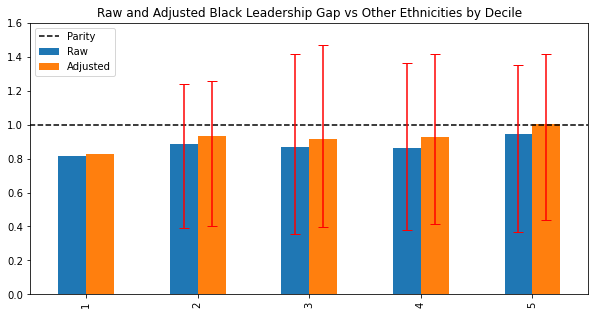

In [20]:
(results_q[["coef_raw", "coef_ds"]] + 1).plot(kind="bar", figsize=(10,5))
plt.ylim(0, 1.6)
plt.title("Raw and Adjusted Black Leadership Gap vs Other Ethnicities by Decile")
plt.hlines(1, -1, quantiles, linestyles="--")
plt.legend(["Parity", "Raw", "Adjusted"])
plt.errorbar(x=[i - 0.125 for i in range(start_q, quantiles+1)], y=[1] * (quantiles - start_q + 1), yerr=abs(results_q[["lower_raw", "upper_raw"]]).T.values, fmt="none", color="red", capsize=5)
plt.errorbar(x=[i + 0.125 for i in range(start_q, quantiles+1)], y=[1] * (quantiles - start_q + 1), yerr=abs(results_q[["lower_ds", "upper_ds"]]).T.values, fmt="none", color="red", capsize=5)
plt.show()